In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime as dt

# Optional: download stopwords
#nltk.download('punkt')
#nltk.download('stopwords')

# Load dataset
df = pd.read_csv("../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv")

# Preview
df.head()



,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [3]:
# Check shape and missing values
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)

# Add headline length
df['headline_length'] = df['headline'].apply(len)


Shape: (1407328, 6)

Missing values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


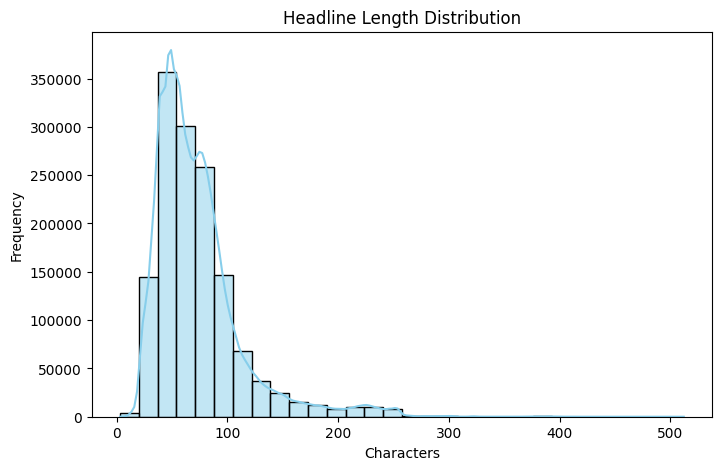

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title('Headline Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()


C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_9552\3350659290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


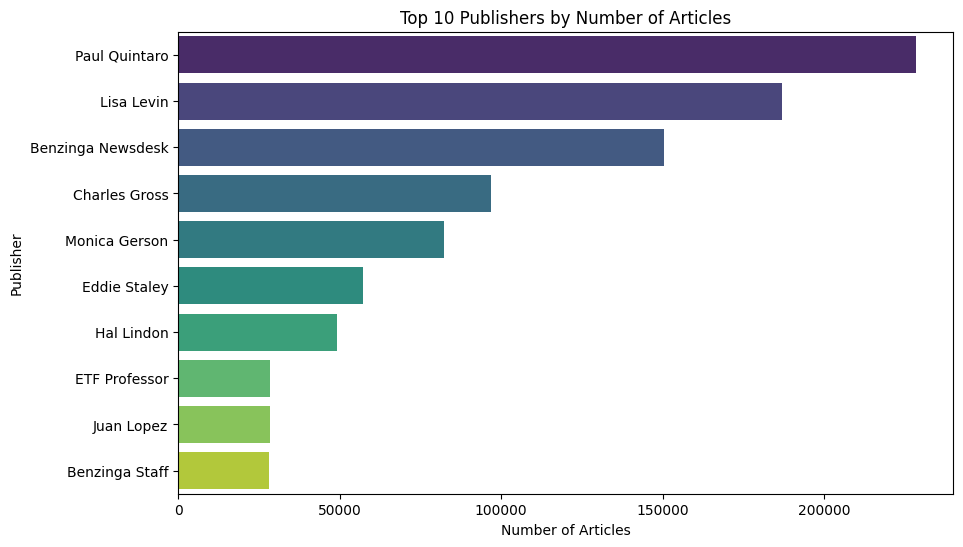

In [5]:
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


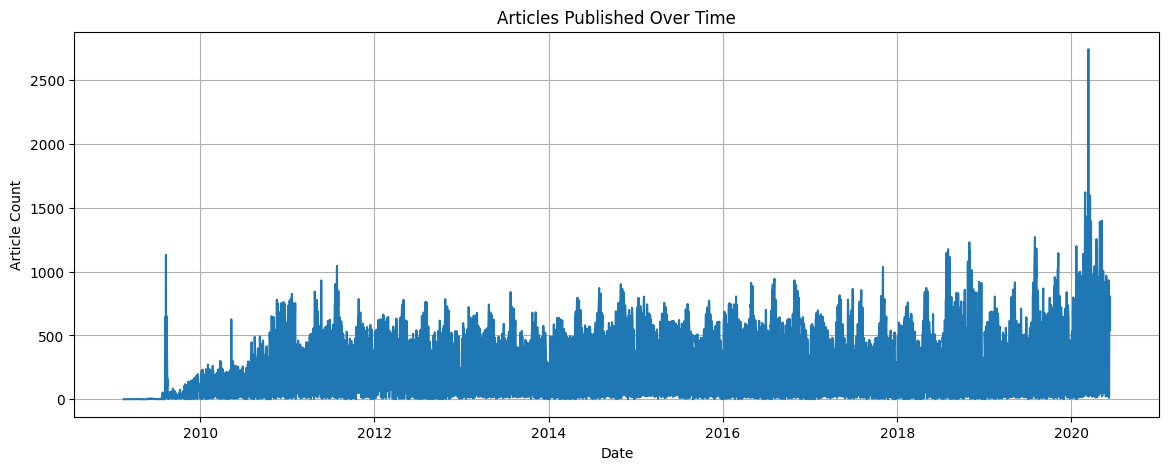

In [6]:
df['day'] = df['date'].dt.date
daily_articles = df.groupby('day').size()

plt.figure(figsize=(14,5))
daily_articles.plot()
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.grid(True)
plt.show()


C:\Users\Dawa Cloud\AppData\Local\Temp\ipykernel_9552\12534820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='mako')


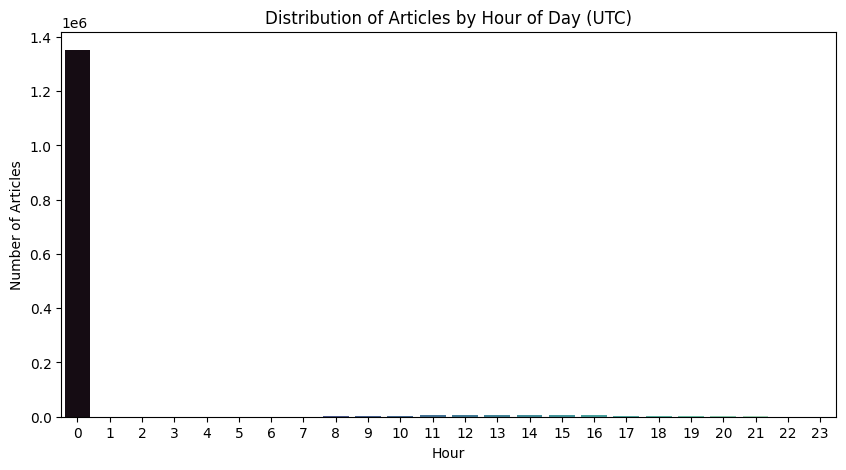

In [7]:
df['hour'] = df['date'].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, palette='mako')
plt.title('Distribution of Articles by Hour of Day (UTC)')
plt.xlabel('Hour')
plt.ylabel('Number of Articles')
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\Dawa
[nltk_data]     Cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


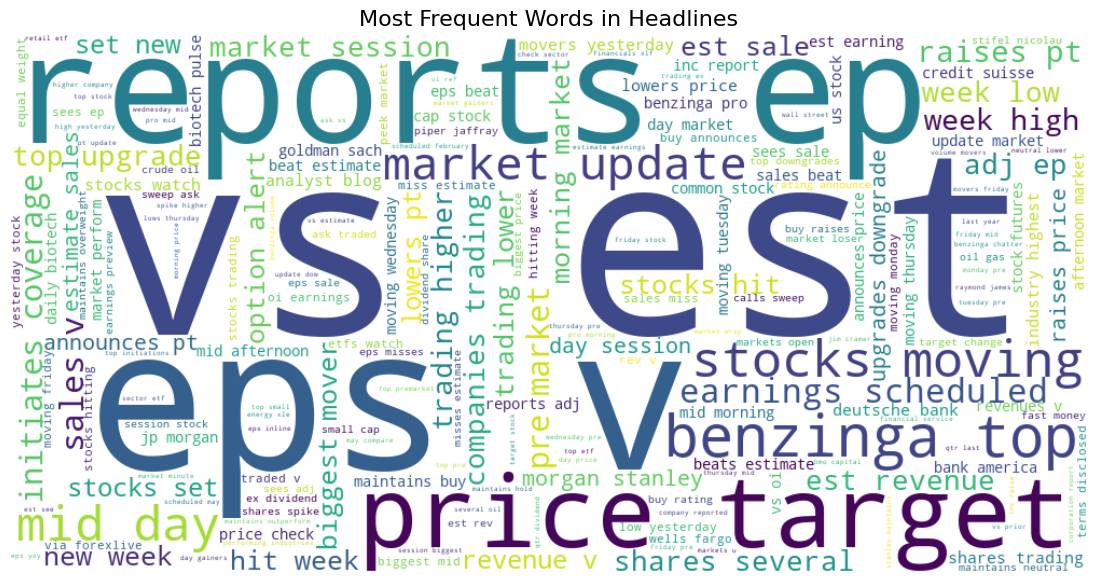

In [11]:
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download stopwords if not already done
nltk.download('stopwords')

# Combine all non-null headlines into one text
all_text = " ".join(df['headline'].dropna().tolist())

# Tokenize using regex (avoids nltk's punkt issue)
tokens = re.findall(r'\b[a-z]+\b', all_text.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [t for t in tokens if t not in stop_words]

# Join filtered tokens back into a string
filtered_text = " ".join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Headlines', fontsize=16)
plt.show()

In [12]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Dawa
[nltk_data]     Cloud\AppData\Roaming\nltk_data...


True

In [13]:
# Initialize the VADER analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df['sentiment_score'] = df['headline'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify sentiment
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
)


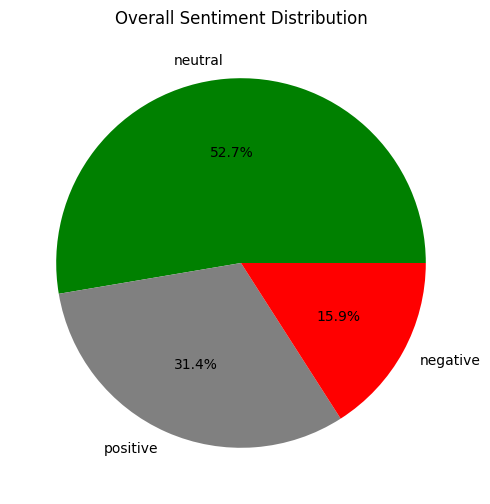

In [14]:
# Pie chart of sentiment labels
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), colors=['green', 'grey', 'red'], title='Overall Sentiment Distribution')
plt.ylabel('')
plt.show()


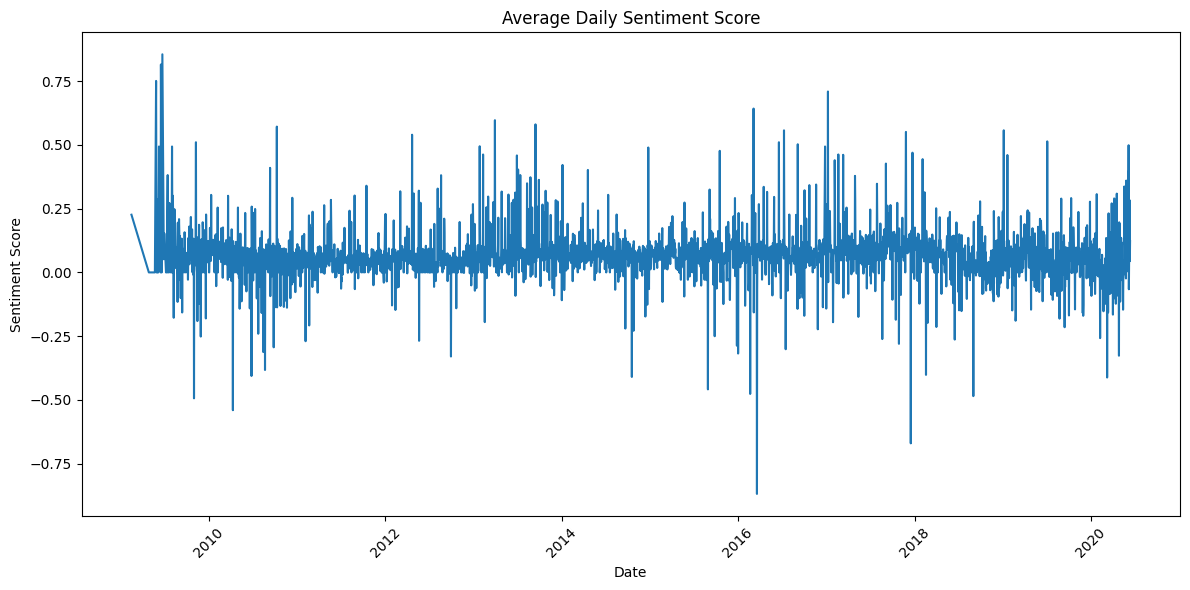

In [15]:
# Group by day
daily_sentiment = df.groupby(df['date'].dt.date)['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_sentiment.index, y=daily_sentiment.values)
plt.title("Average Daily Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
